In [107]:
import numpy as np
import pandas as pd
import math

train_df = pd.read_csv('train.csv')
feature_set = train_df.drop(['letter'], axis=1)
labels = pd.get_dummies(train_df['letter'])

max_tr = feature_set.max()
min_tr = feature_set.min()
def normalize(x): 
    return (x-min_tr)/(max_tr-min_tr)
feature_set = normalize(feature_set)
feature_set = feature_set.sample(frac=1).reset_index(drop=True)

In [108]:
np.random.seed(42)
weights = np.random.rand(26,16)
bias = np.random.rand(26,1)
lr = 0.10

In [109]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [110]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

0.43386210945210774
0.4209599714859284
0.40874599511883836
0.3971682520581512
0.38617981978929655
0.3757381994469451
0.3658048124104656
0.35634456355487715
0.34732546114696944
0.3387182850497164
0.3304962962645531
0.3226349819616991
0.3151118310714343
0.3079061362720631
0.3009988188433085
0.2943722733810794
0.28801022981017343
0.2818976305009943
0.27602052060722604
0.27036595000378855
0.2649218854264952
0.25967713160340583
0.25462126032840676
0.24974454656461745
0.24503791078253967
0.24049286683854426
0.23610147478590965
0.23185629808530633
0.2277503647461889
0.22377713198647375
0.21993045404644082
0.21620455283502932
0.21259399112353478
0.20909364803386915
0.20569869659671758
0.2024045831795943
0.19920700860650534
0.19610191081000308
0.19308544887324347
0.19015398833452374
0.18730408763990908
0.18453248564121166
0.18183609004690726
0.17921196674276552
0.17665732990712785
0.1741695328530657
0.17174605953613475
0.16938451667226315
0.1670826264155038
0.16483821955004205
0.162649229155025

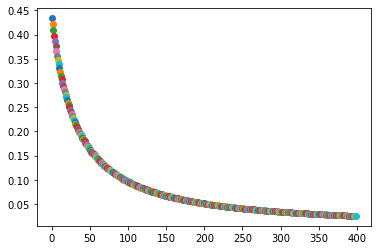

In [111]:
XW = np.zeros(26)
z = np.zeros(26)
dpred_dz = np.zeros(26)
q = np.zeros(26)

for epoch in range(400):
    error = 0
    
    for j in range(100):
        for i in range(26):
            # feedforward step1
            XW[i] = np.dot(feature_set.iloc[j], weights[i]) + bias[i]

        #feedforward step2
        z = sigmoid(XW)


        # backpropagation step 1
        for i in range(26):
            q[i] = math.log2(z[i])              #cross entropy cost function
            dpred_dz[i] = sigmoid_der(z[i])
        error += np.dot(labels.iloc[j],q)

    # backpropagation step 2
    dcost_dpred = error/13
    

    z_delta = dcost_dpred * dpred_dz


    for num in range(26):
        bias[num] -= lr * z_delta[num]
        weights[num] -= lr * z_delta[num] * weights[num]
    
    print(abs(error)/13)
    plt.scatter(epoch,abs(error)/13)
    plt.plot(epoch,abs(error)/13)

In [112]:
val_df = pd.read_csv('val.csv')
feature_set = val_df.drop(['letter'], axis=1)
labels = pd.get_dummies(val_df['letter'])

feature_set = normalize(feature_set)
feature_set = feature_set.sample(frac=1).reset_index(drop=True)

In [113]:
error=0
for j in range(100):
    for i in range(26):
        XW[i] = np.dot(feature_set.iloc[j], weights[i]) + bias[i]

    z = sigmoid(XW)

    for i in range(26):
        q[i] = math.log2(z[i])              
        dpred_dz[i] = sigmoid_der(z[i])
    error += np.dot(labels.iloc[j],q)
        
print(abs(error)/13)

0.01666031746584183
